# Elimination of harmonic disturbances
In this notebook, the properties of the special parametrization $N=0$ and $\alpha=\beta$ of algebraic differentiators are considered. The Fourier transform of the kernel satisfies
\begin{equation}
    \mathcal{G}^{(\alpha,\alpha)}_{0,T,\vartheta}(\omega)=\mathrm{e}^{-\iota\frac{\omega T}{2}}\Gamma\left(\alpha+\frac{3}{2}\right)\left(\frac{4}{\omega T}\right)^{\alpha+\frac{1}{2}}\mathrm{J}_{\alpha+\frac{1}{2}}\left(\frac{\omega T}{2}\right),\quad \iota^2=-1,
\end{equation}
where $\mathrm{J}_{\alpha+\frac{1}{2}}$ is the [Bessel function of the first kind](https://en.wikipedia.org/wiki/Bessel_function#Bessel_functions_of_the_first_kind:_J%CE%B1) and order $\alpha+1/2$. Thus, the differentiator provides phase linearity. Moreover, the Fourier transform possesses an infinte number of simple
positive zeros since $\alpha > -1/2$. For applications where a dominant harmonic disturbance of angular frequency $\omega_r$ appears, the disturbance can be eliminated by the choice $N=0$, $\alpha=\beta$ and $\omega_rT/2=j^{(\alpha)}_{k}$, $k=1,2,\dots$, for $j^{(\alpha)}_{k}$ a zero of the Bessel function.


The differentiator has the parameters:
Alpha: 1.000000
Beta: 1.000000
Window length in s: 0.089868
Sampling period in s: 0.002000
Polynomial degree: 0
Estimation delay in s: 0.044934
Cutoff Frequency in rad/s: 27.256472
Cutoff Frequency in Hz: 4.338002
Discrete window length: 44


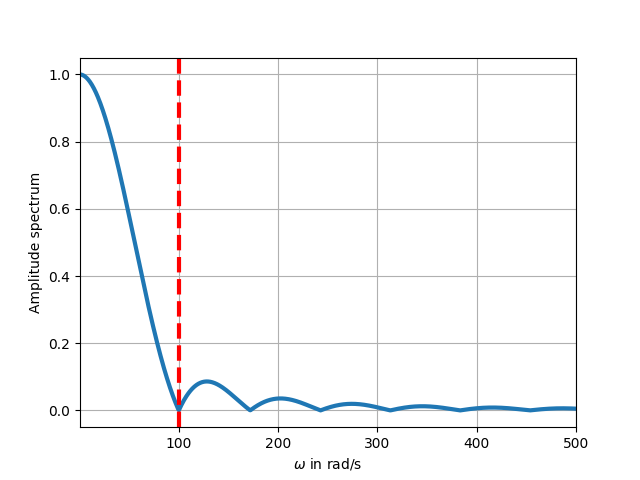

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from AlgDiff import *
import numpy as np
import mpmath as mp

################################################################
# Parametrize a differentiator to eliminate an angular
# frequency \omega_r
################################################################
wr = 100
alpha = 1
ts = 0.002 # 500 Hz
k = 1 # Choose the k-th zero of the Bessel function
jk = float(mp.besseljzero(alpha+0.5,k))
T = 2*jk/wr
algDiff = AlgebraicDifferentiator(N=0,alpha=alpha,beta=alpha,
                                  T=T,wc=None, ts=ts)

################################################################
# Evaluate Fourier transform
################################################################
omega = np.linspace(0,500,1000)
amp,phase = algDiff.get_ampAndPhaseFilter(omega)

################################################################
# Plot results
################################################################
fig, ax = plt.subplots(nrows=1, ncols=1,sharex=False)
l = 3
ax.plot(omega,abs(amp),linewidth=l)
ax.set_xlabel(r"$\omega$ in rad/s")
ax.set_ylabel(r"Amplitude spectrum")
ax.set_xlim((omega[1],omega[-1]))
v = ax.axvline(x=wr)
v.set_linestyle('--')
v.set_color('r')
v.set_linewidth(l)
ax.grid()
plt.show()


# Validation of the approach
Consider the signal 
\begin{equation}
y(t)=x(t)+\eta(t)+\varOmega(t),\quad x(t)=\sin(\omega_0 t),\quad \eta(t)=\eta_0\frac{1}{2}\cos(\omega_{\mathrm{r}}t), \;\eta_0\in\mathbb{R},
\end{equation}
where $\eta$ and $\varOmega$ are a disturbance signal with known frequency $\omega_{\mathrm{r}}$ and a white Gaussian noise, respectively. The first order derivative of the signal $x$ shall be estimated using $y$. The influence of $\eta$ must be  annihilated.

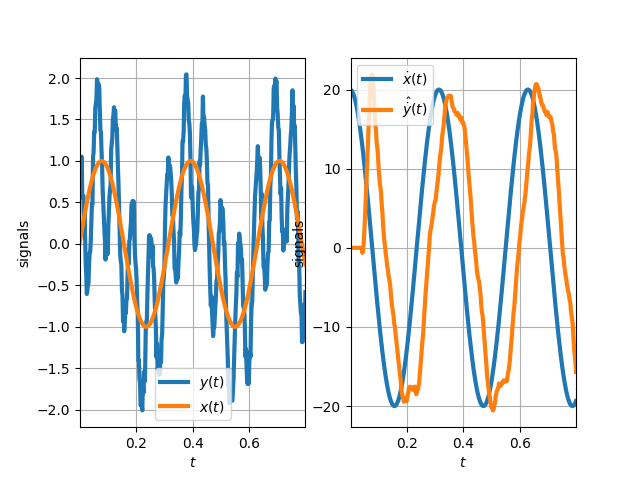

In [2]:
################################################################
# Define signals and estimate derivatives
################################################################
# Define time
t = np.arange(0,0.8,ts)
# Define signal properties
w0 = 20
eta0 = 1
noise = np.random.normal(0,0.1,len(t))
x = np.sin(w0*t)
y = x+eta0*np.cos(wr*t)+noise
# Define true derivatives
dxdt = w0*np.cos(w0*t)
# Estimate derivative
dyApp = algDiff.estimateDer(1,y)

################################################################
# Plot results
################################################################
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=True)
l = 3
ax[0].plot(t,y,linewidth=l,label=r'$y(t)$')
ax[0].plot(t,x,linewidth=l,label=r'$x(t)$')
ax[0].set_xlabel(r"$t$")
ax[0].set_ylabel(r"signals")
ax[0].set_xlim((t[1],t[-1]))
ax[0].grid()
ax[0].legend()

ax[1].plot(t,dxdt,linewidth=l,label=r'$\dot{x}(t)$')
ax[1].plot(t,dyApp,linewidth=l,label=r'$\hat{\dot{y}}(t)$')
ax[1].set_xlabel(r"$t$")
ax[1].set_ylabel(r"signals")
ax[1].set_xlim((t[1],t[-1]))
ax[1].grid()
ax[1].legend()
plt.show()

